# Aarav Gosalia

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as pf
pd.options.mode.chained_assignment = None 

In [2]:
sns.set_theme(style="ticks", font_scale=0.8)

In [6]:
dataset = pd.read_csv("../data/raw/dataset_raw.csv",low_memory=False)

In [7]:
data = dataset[["region_group","country","year","Location","literacy_1524_no"]]
data.describe()

,year,literacy_1524_no
count,212879.000000,25557.00000
mean,2009.909070,787.90531
std,5.434321,1825.95407
min,1996.000000,30.00000
25%,2006.000000,104.00000
50%,2011.000000,253.00000
75%,2015.000000,732.00000
max,2019.000000,55976.00000


In [8]:
data.describe(exclude=[np.number])

,region_group,country,Location
count,212939,212879,94809
unique,7,176,2
top,Latin America and the Caribbean,Brazil,Urban
freq,58636,6538,51664


In [9]:
data = data.dropna(subset="literacy_1524_no")
data = data.reset_index()
data = data.drop(columns = ["index"])
data = data.rename(columns = {"literacy_1524_no" : "literacy_rates"})

In [10]:
functions = {'country': 'first','year': 'first','literacy_rates': 'sum','region_group' : 'first'}
data_final = data.groupby(["country","year"]).agg(functions)

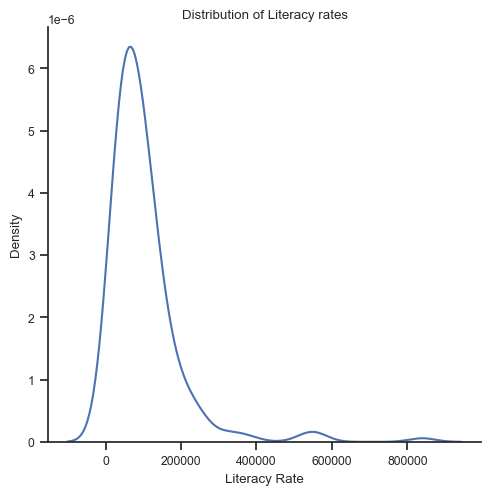

In [11]:
sns.displot(data_final["literacy_rates"], kind = "kde").set(xlabel = "Literacy Rate", title = "Distribution of Literacy rates")
#can be used to choose base value of literacy rate to see which countries are considered already literate 

In [3]:
data_processed = pf.data_processing("../data/raw/dataset_raw.csv")
dictionary = pf.plotting(data_processed)

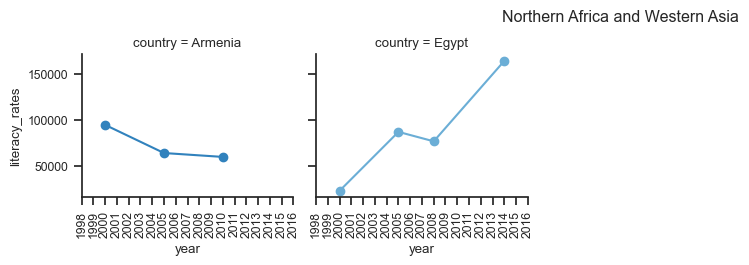

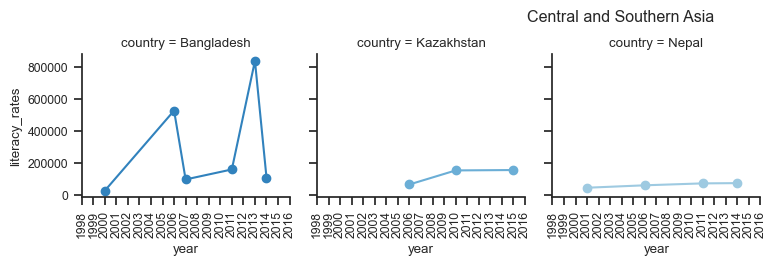

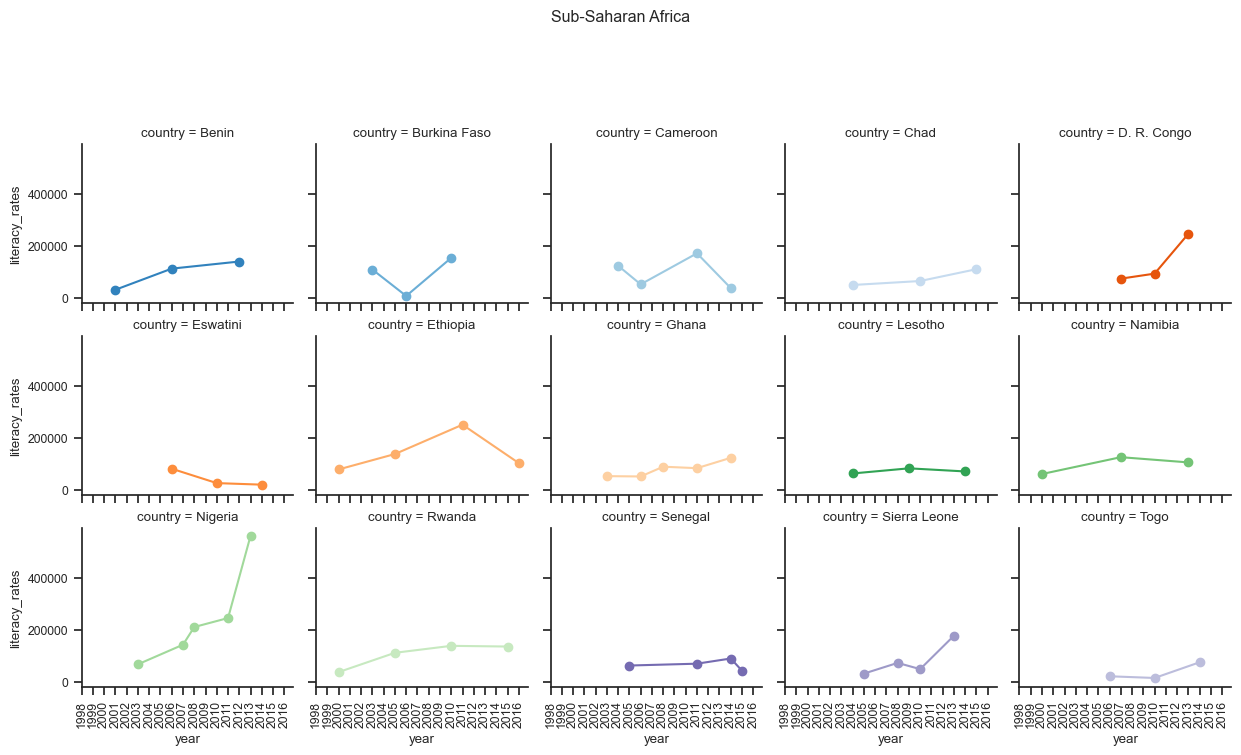

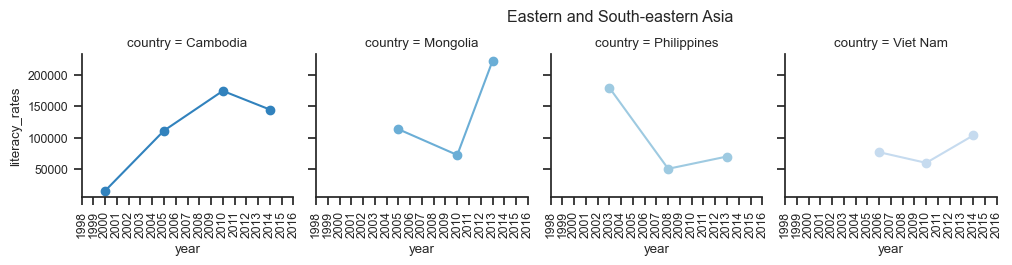

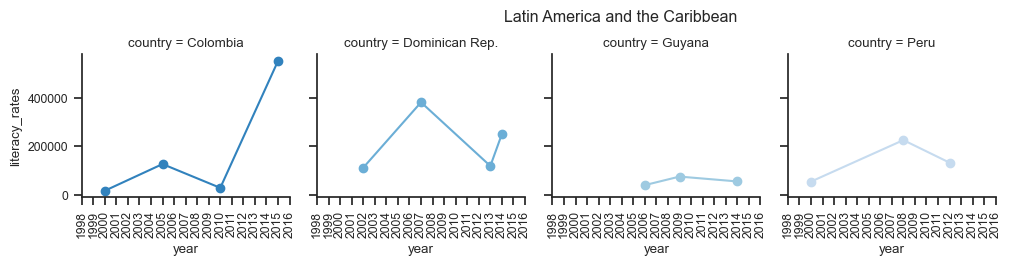

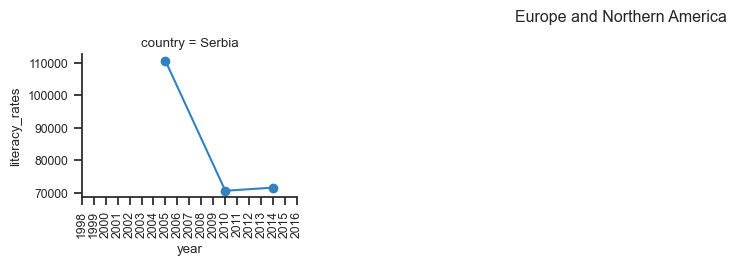

In [41]:
for i in range(6):
    grid = sns.FacetGrid(list(dictionary.values())[i], col="country", hue="country", palette="tab20c", col_wrap=5, height=2.5)
    grid.map(plt.plot, "year", "literacy_rates", marker="o")
    grid.set(xticks=np.arange(1998,2017))
    grid.set_xticklabels(np.arange(1998,2017), rotation=90)
    grid.fig.subplots_adjust(top=0.8)
    grid.fig.suptitle(list(dictionary.keys())[i])

In [49]:
dictionary2 = {}
for i in range(6):
    list(dictionary.values())[i].reset_index(drop = True, inplace = True)
    first_values = list(dictionary.values())[i].groupby(["country"]).agg({'country': 'first','year': 'min','literacy_rates': 'first'})
    last_values = list(dictionary.values())[i].groupby(["country"]).agg({'country': 'first','year': 'max','literacy_rates': 'last'})
    plot_values = first_values[["country"]]
    plot_values["percentage change"] = (last_values.literacy_rates-first_values.literacy_rates)/(first_values.literacy_rates)*100
    plot_values.reset_index(drop = True, inplace = True)
    dictionary2[list(dictionary.keys())[i]] = plot_values
    #create a dataframe for average percentage change based on each region and create a bar plot
    #combine all of the countries percentage change dfs and create a barplot

<AxesSubplot:xlabel='country', ylabel='percentage change'>

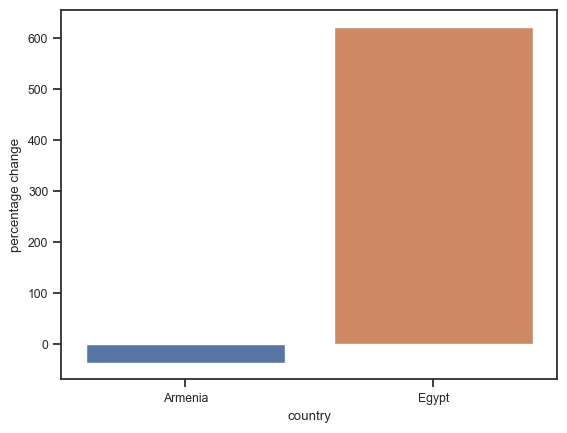

In [55]:
sns.barplot(data = list(dictionary2.values())[0], x="country", y="percentage change")

<AxesSubplot:xlabel='country', ylabel='percentage change'>

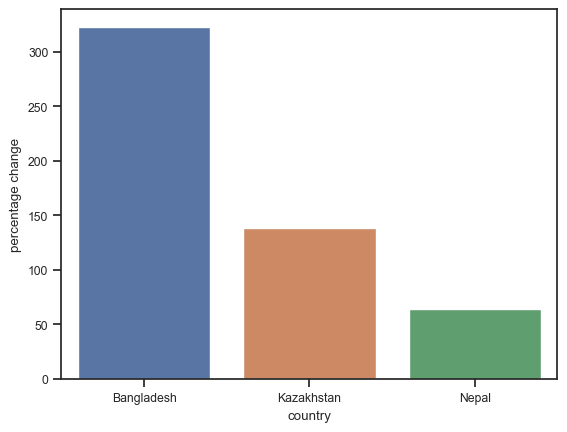

In [54]:
sns.barplot(data = list(dictionary2.values())[1], x="country", y="percentage change")

## Research question/interests
**Has there been a positive or negative change in literacy rates in previosly literate and non-literate countries and what could be the factors affecting it?**

Briefly describe your research question or interests here.

I will first filter out the countries which have only 1 year of data. Then I will check the first year of data collected for literacy number of different countries to classify them as previously literate or non-literate. Then I will plot two facetgrids containing literate and non-literate countries and compare literacy rates over the years and try to find some reasons and factors that have affected literacy rates.(ex. Economy condition, War)